# Import modules

In [1]:
import mvranalysis as mvr
import os
import numpy as np
import pandas as pd
import scipy.io as sio
from glob import glob
import json
import seaborn as sns
sns.set_style('white')

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from colorsys import hsv_to_rgb, rgb_to_hsv
%matplotlib inline

//anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [60]:
path148 = '/Volumes/freeman/Nick/mVR/148'
path149 = '/Volumes/freeman/Nick/mVR/149'
path150 = '/Volumes/freeman/Nick/mVR/150'
path151 = '/Volumes/freeman/Nick/mVR/151'
mainpath = '/Volumes/freeman/Nick/mVR/sessions'

paths = [path148,path149,path150,path151]

In [61]:
#sessions = [glob(path+'/trial_summary*.csv') for path in paths]
#[sessions[a].sort() for a in range(len(sessions))]
#sessions.sort()

In [78]:
summaries = glob(mainpath + '/animalsummary*.csv')

print summaries.sort()

None


# Get animal stats (batch)

In [79]:
animal_stats = [pd.Series.from_csv(x) for x in summaries]
animal_stats

[Animal                1.480000e+02
 correctAfter          1.000000e+00
 correctAntibias       9.401709e-01
 correctBefore         1.555804e-01
 incomplete            8.000000e+00
 meanAntibiasIdPhi     1.043620e+01
 meanAntibiaszIdPhi    1.000000e+00
 meanAntibiaszIdphi   -7.825361e-17
 meanChoiceTime        1.952911e+00
 meanIdPhi             7.210739e+00
 meanNumTrials         8.871429e+01
 meanTime              1.413799e+01
 meanzIdPhi           -2.299491e-17
 medianIdPhi           1.180663e+00
 medianzIdPhi         -3.315009e-01
 numDays               7.000000e+00
 stdAntibiasIdPhi      2.369469e+01
 stdIdPhi              1.819023e+01
 stdzIdPhi             1.000000e+00
 totalDeadEnd          7.000000e+00
 dtype: float64, Animal                1.490000e+02
 correctAfter          8.509663e-01
 correctAntibias       9.572946e-01
 correctBefore         4.302982e-01
 incomplete            1.000000e+00
 meanAntibiasIdPhi     1.580488e+01
 meanAntibiaszIdPhi    1.000000e+00
 meanAntibia

In [80]:
UB_before = [x.correctBefore for x in animal_stats]
AB = [x.correctAntibias for x in animal_stats]
UB_after = [x.correctAfter for x in animal_stats]

means = np.array([UB_before, AB, UB_after])
print means
meansT = np.transpose(means)
print meansT

[[ 0.15558036  0.43029819  0.29021368  0.18445553]
 [ 0.94017094  0.95729458  0.97061201  0.97012165]
 [ 1.          0.85096634  0.995       1.        ]]
[[ 0.15558036  0.94017094  1.        ]
 [ 0.43029819  0.95729458  0.85096634]
 [ 0.29021368  0.97061201  0.995     ]
 [ 0.18445553  0.97012165  1.        ]]


In [81]:
mean_before = np.mean(UB_before)
mean_antibias = np.mean(AB)
mean_after = np.mean(UB_after)

perc_corr =  [mean_before, mean_antibias, mean_after]
print perc_corr

[0.26513693807424998, 0.95954979616425007, 0.96149158424824999]


# Create batch bar plot (performance)

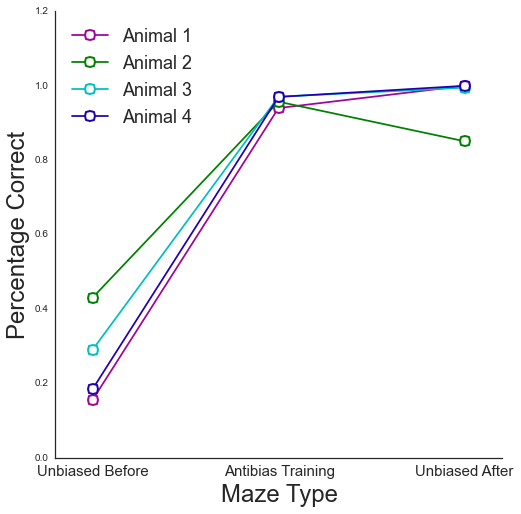

In [117]:
plt.figure(figsize = [8,8])
clrs = ['#a00498', 'g', 'c', '#2000b1']
ypos = np.arange(len(perc_corr))
[plt.plot(ypos,meansT[i],
          marker='o', 
          mfc = 'w',
          markeredgecolor= clrs[i],
          markeredgewidth=2.0,
          markersize = 10.0, 
          color = clrs[i]) for i in range(len(meansT))]


plt.xlabel('Maze Type', fontsize = 24.0)
plt.ylabel('Percentage Correct', fontsize = 24.0)
#plt.title('Overall Performance', fontsize = 20.0)
labels = ['Unbiased Before', 'Antibias Training', 'Unbiased After']
plt.xticks(ypos,labels, fontsize = 15.0)
plt.ylim(0,1.2)
plt.xlim(-0.2,2.2)
sns.despine()
plt.legend(['Animal 1', 'Animal 2', 'Animal 3','Animal 4'], loc ='best', fontsize = 18.0)
plt.savefig('batchplot.eps', format='eps')


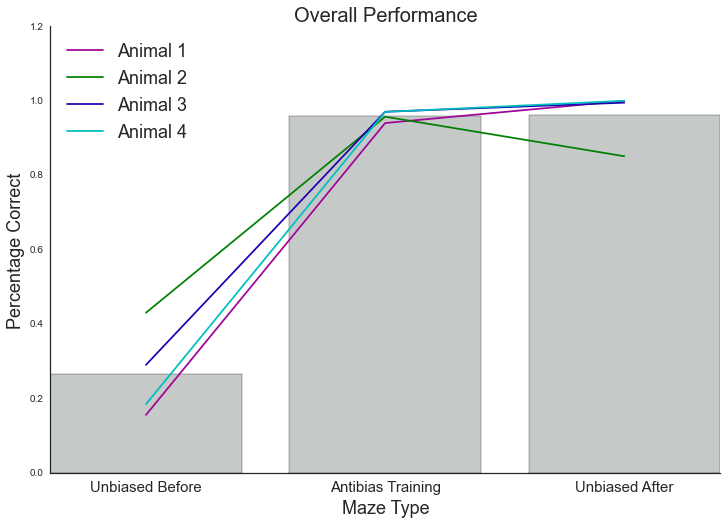

In [82]:
plt.figure(figsize = [12,8])
plt.bar(range(0,len(perc_corr)),perc_corr,align = 'center', color = '#c5c9c7')
#sns.barplot(data = perc_corr, edgecolor = '.2', facecolor = (1, 1, 1, 0))
labels = ['Unbiased Before', 'Antibias Training', 'Unbiased After']
ypos = np.arange(len(perc_corr))
plt.xticks(ypos,labels, fontsize = 15.0)
plt.xlabel('Maze Type', fontsize = 18.0)
plt.ylabel('Percentage Correct', fontsize = 18.0)
plt.title('Overall Performance', fontsize = 20.0)
plt.ylim(0,1.2)

plt.plot(ypos, meansT[0], '-', color = '#a00498')
plt.plot(ypos, meansT[1], '-',color='g')
plt.plot(ypos,meansT[2],'-',color='#2000b1')
plt.plot(ypos,meansT[3],'-',color='c')
sns.despine()
plt.legend(['Animal 1', 'Animal 2', 'Animal 3','Animal 4'], loc ='best', fontsize = 18.0)


# Compile Rolling averages

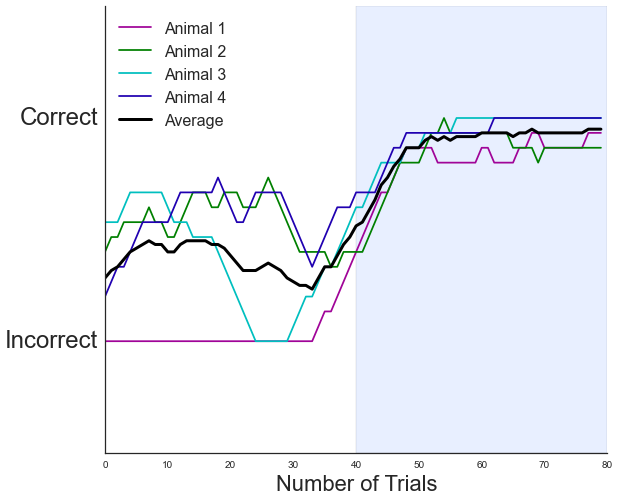

In [119]:
plt.figure(figsize = [9,8])

averages = glob(mainpath+'/rollingavg*.csv')
averages.sort()
averages = [pd.Series.from_csv(x) for x in averages]

#print len(averages[0]),len(averages[1]),len(averages[2]),len(averages[3])
plt.plot(averages[0],color = '#a00498')
plt.ylim(-0.5,1.5)
plt.xlim(0,80)
plt.plot(averages[1], color='g')
plt.plot(averages[2], color='c')
plt.plot(averages[3], color='#2000b1')
plt.xlabel('Number of Trials',fontsize = 22)
plt.yticks([0,1], ['Incorrect','Correct'],fontsize = 24)
#plt.title('Maze Transition Performance', fontsize = 20)
#plt.axvline(x=40,c = 'k')
plt.axvspan(40,80, facecolor = [0.7,0.8,1.0], alpha = 0.3)

avgT = np.transpose(averages)

totalavg = [np.mean(i) for i in avgT]

plt.plot(totalavg, linewidth = 3.0, color = 'k')
sns.despine()

plt.legend(['Animal 1', 'Animal 2','Animal 3','Animal 4', 'Average'], loc = 'best', fontsize = 16.0)
plt.savefig('batchtrans.eps', format='eps')